In [1]:
import numpy as np
import gdal
import os
import pandas as pd
import geopandas as gpd
from skimage import io
from skimage.io import imread

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from PIL import Image

In [4]:
label_roi = gdal.Open("C:\\Users\\Lenovo\\Desktop\\Harvesting_Unsupervised\\label_3.tif")
print(label_roi)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000002216385CD80> >


In [5]:
label_roi.RasterXSize, label_roi.RasterYSize, label_roi.RasterCount

(8298, 8963, 1)

In [6]:
label = label_roi.GetRasterBand(1).ReadAsArray()
print(label)
type(label)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


numpy.ndarray

In [7]:
label.size, label.shape

(74374974, (8963, 8298))

In [8]:
np.unique(label)

array([0, 1, 2])

In [9]:
# reading the csv file which has the labeled indices..

labeled_indices = pd.read_csv("C:\\Users\\Lenovo\\Desktop\\Harvesting_Unsupervised\\labeled_index.csv")
labeled_indices

,Unnamed: 0,x_index,y_index,class
0,0,5058,1820,1
1,1,5098,1864,1
2,2,4967,1805,1
3,3,4894,1836,1
4,4,5009,1764,1
...,...,...,...,...
156,156,5084,2367,2
157,157,1268,5849,2
158,158,5437,5497,2
159,159,3079,3214,2


In [10]:
labeled_indices.drop(labeled_indices.columns[0], axis = 1, inplace = True)
labeled_indices

,x_index,y_index,class
0,5058,1820,1
1,5098,1864,1
2,4967,1805,1
3,4894,1836,1
4,5009,1764,1
...,...,...,...
156,5084,2367,2
157,1268,5849,2
158,5437,5497,2
159,3079,3214,2


In [11]:
# now mapping these indices to the input images of 6 months.
# before that reading one input image

image_1 = gdal.Open("C:\\Users\\Lenovo\\Desktop\\Harvesting_Unsupervised\\1.tif")
print(image_1)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000001F7D089BF30> >


In [12]:
image_1.RasterXSize, image_1.RasterYSize, image_1.RasterCount

(8298, 8963, 5)

In [13]:
# splitting this image band wise, as there are 5 bands, we would get 5 images from this multispectral image.

image_1_zero = np.zeros((image_1.RasterYSize, image_1.RasterXSize, image_1.RasterCount))

In [14]:
image_1_zero.shape

(8963, 8298, 5)

In [15]:
for b in range(image_1_zero.shape[2]):
    image_1_zero[:, :, b] = image_1.GetRasterBand(b + 1).ReadAsArray()

In [16]:
image_1_zero

array([[[nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        ...,
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan]],

       [[nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        ...,
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan]],

       [[nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        ...,
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan]],

       ...,

       [[nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        ...,
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan]],

       [[nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan

In [17]:
# storing band1 of the imgae in separate image

image_1_band1 = image_1_zero[:,:,0]
image_1_band1

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [18]:
image_1_band1.shape

(8963, 8298)

In [19]:
# similarly doing it for all the bands of the image and storing in a separate image

image_1_band2 = image_1_zero[:,:,1]
image_1_band3 = image_1_zero[:,:,2]
image_1_band4 = image_1_zero[:,:,3]
image_1_band5 = image_1_zero[:,:,4]

image_1_band2.shape, image_1_band3.shape, image_1_band4.shape, image_1_band5.shape

((8963, 8298), (8963, 8298), (8963, 8298), (8963, 8298))

In [20]:
np.unique(image_1_band1)

array([1006., 1016., 1018., ...,   nan,   nan,   nan])

In [21]:
image_1_band1 = image_1_band1.T

In [22]:
image_1_band1.shape

(8298, 8963)

In [23]:
labeled_indices

,x_index,y_index,class
0,5058,1820,1
1,5098,1864,1
2,4967,1805,1
3,4894,1836,1
4,5009,1764,1
...,...,...,...
156,5084,2367,2
157,1268,5849,2
158,5437,5497,2
159,3079,3214,2


In [24]:
image_1_band1[5058, 1820], image_1_band1[5098, 1864], image_1_band1[4967, 1805]

(1208.0, 1191.0, 1216.0)

In [25]:
image_1_band1[2790, 2520], image_1_band1[3079, 3214], image_1_band1[5437, 5497]

(1506.0, 1350.0, 1575.0)

In [26]:
# not right just for clarification

image_1_band1[1820, 5058], image_1_band1[1864, 5098], image_1_band1[1805, 4967]

(1257.0, 1668.0, 1789.0)

In [27]:
# not right just for clarification

image_1_band1[2520, 2790], image_1_band1[3214, 3079], image_1_band1[5497, 5437]

(1311.0, 1769.0, 1219.0)

In [28]:
# now reading the pixel values for the indices which are labeled as wheat, assuming as not known class labeled as 1 is wheat

labeled_indices_wheat = labeled_indices[labeled_indices["class"] == 1]
labeled_indices_wheat

,x_index,y_index,class
0,5058,1820,1
1,5098,1864,1
2,4967,1805,1
3,4894,1836,1
4,5009,1764,1
...,...,...,...
59,6752,4528,1
60,2349,3084,1
61,2123,3035,1
62,2840,3162,1


In [29]:
# and other label 2 is non-wheat

labeled_indices_nonwheat = labeled_indices[labeled_indices["class"] == 2]
labeled_indices_nonwheat


,x_index,y_index,class
64,5973,513,2
65,5974,670,2
66,5967,669,2
67,5971,655,2
68,5967,655,2
...,...,...,...
156,5084,2367,2
157,1268,5849,2
158,5437,5497,2
159,3079,3214,2


In [30]:
labeled_indices_nonwheat.reset_index(drop=True,inplace=True)
labeled_indices_nonwheat

,x_index,y_index,class
0,5973,513,2
1,5974,670,2
2,5967,669,2
3,5971,655,2
4,5967,655,2
...,...,...,...
92,5084,2367,2
93,1268,5849,2
94,5437,5497,2
95,3079,3214,2


In [31]:
type(labeled_indices_wheat["x_index"].values)

numpy.ndarray

In [32]:
labeled_indices_nonwheat.iloc[0, 0]

5973

In [33]:
len(labeled_indices_wheat["x_index"].values)

64

In [34]:
len(labeled_indices_nonwheat["x_index"].values)

97

In [35]:
image_1_band_1 = []


In [36]:
# printing all pixel values of band1 of image1(10_2019) having labeled as wheat

for i in range(len(labeled_indices_wheat["x_index"].values)):
    image_1_band_1.append(image_1_band1[labeled_indices_wheat.iloc[i,0], labeled_indices_wheat.iloc[i,1]])

In [37]:
image_1_band_1

[1208.0,
 1191.0,
 1216.0,
 1175.0,
 1197.0,
 1190.0,
 1166.0,
 1209.0,
 1187.0,
 1187.0,
 1154.0,
 1184.0,
 1194.0,
 1237.0,
 1210.0,
 1183.0,
 1204.0,
 1199.0,
 1154.0,
 1150.0,
 1164.0,
 1204.0,
 1187.0,
 1184.0,
 1190.0,
 1201.0,
 1188.0,
 1162.0,
 1180.0,
 1208.0,
 1216.0,
 1216.0,
 1191.0,
 1167.0,
 1220.0,
 1153.0,
 1228.0,
 1192.0,
 1188.0,
 1149.0,
 1187.0,
 1175.0,
 1173.0,
 1133.0,
 1152.0,
 1132.0,
 1164.0,
 1178.0,
 1239.0,
 1248.0,
 1235.0,
 1225.0,
 1255.0,
 1225.0,
 1260.0,
 1273.0,
 1259.0,
 1197.0,
 1292.0,
 1203.0,
 1269.0,
 1258.0,
 1261.0,
 1408.0]

In [38]:
# printing all pixel values of band1 of image1(10_2019) having labeled as nonwheat

for i in range(len(labeled_indices_nonwheat["x_index"].values)):
    image_1_band_1.append(image_1_band1[labeled_indices_nonwheat.iloc[i,0], labeled_indices_nonwheat.iloc[i,1]])

In [39]:
image_1_band_1 = np.array(image_1_band_1)

In [40]:
image_1_band_1.shape, image_1_band_1.size, image_1_band_1.ndim

((161,), 161, 1)

In [41]:
image_1_band_1_df = pd.DataFrame(data=image_1_band_1)
image_1_band_1_df

,0
0,1208.0
1,1191.0
2,1216.0
3,1175.0
4,1197.0
...,...
156,1221.0
157,1559.0
158,1575.0
159,1350.0


In [42]:
image_1_band_1_df.columns = ["Image1band1"]
image_1_band_1_df

,Image1band1
0,1208.0
1,1191.0
2,1216.0
3,1175.0
4,1197.0
...,...
156,1221.0
157,1559.0
158,1575.0
159,1350.0


In [43]:
training_df = pd.DataFrame()

In [44]:
training_df = pd.concat([image_1_band_1_df, training_df], axis=0)
training_df

,Image1band1
0,1208.0
1,1191.0
2,1216.0
3,1175.0
4,1197.0
...,...
156,1221.0
157,1559.0
158,1575.0
159,1350.0


In [45]:
x = labeled_indices.iloc[:, 0]
y = labeled_indices.iloc[:, 1]

print(x,"\n\n ****************\n\n",y)

0      5058
1      5098
2      4967
3      4894
4      5009
       ... 
156    5084
157    1268
158    5437
159    3079
160    2790
Name: x_index, Length: 161, dtype: int64 

 ****************

 0      1820
1      1864
2      1805
3      1836
4      1764
       ... 
156    2367
157    5849
158    5497
159    3214
160    2520
Name: y_index, Length: 161, dtype: int64


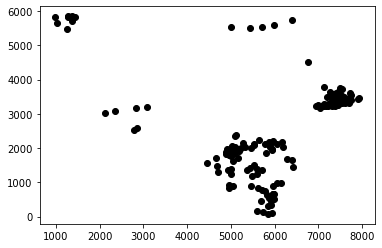

In [46]:
plt.plot(x, y, 'o', color='black');

In [47]:
classes = labeled_indices["class"]
classes, type(classes)

(0      1
 1      1
 2      1
 3      1
 4      1
       ..
 156    2
 157    2
 158    2
 159    2
 160    2
 Name: class, Length: 161, dtype: int64,
 pandas.core.series.Series)

In [48]:
classes = pd.DataFrame(data=classes)
classes

,class
0,1
1,1
2,1
3,1
4,1
...,...
156,2
157,2
158,2
159,2


In [49]:
training_df = pd.concat([training_df, classes], axis=1)
training_df

,Image1band1,class
0,1208.0,1
1,1191.0,1
2,1216.0,1
3,1175.0,1
4,1197.0,1
...,...,...
156,1221.0,2
157,1559.0,2
158,1575.0,2
159,1350.0,2


In [50]:
# dataframe "training_df" consist of all the labeled pixel values for image1(10_2019) band1
# corresponding to the coordinates given in the shape file.
# similarly we will do this for other bands and images to will we have a dataframe of 161 x 31

# similarly doing it for all the bands of the image and storing in a separate image

image_1_band2 = image_1_zero[:,:,1]
image_1_band3 = image_1_zero[:,:,2]
image_1_band4 = image_1_zero[:,:,3]
image_1_band5 = image_1_zero[:,:,4]

image_1_band2.shape, image_1_band3.shape, image_1_band4.shape, image_1_band5.shape


((8963, 8298), (8963, 8298), (8963, 8298), (8963, 8298))

In [51]:
image_1_band2 = image_1_band2.T
image_1_band3 = image_1_band3.T
image_1_band4 = image_1_band4.T
image_1_band5 = image_1_band5.T

image_1_band2.shape, image_1_band3.shape, image_1_band4.shape, image_1_band5.shape

((8298, 8963), (8298, 8963), (8298, 8963), (8298, 8963))

In [52]:
# printing all pixel values of band2 of image1(10_2019) having labeled as wheat

image_1_band_2 = []

for i in range(len(labeled_indices_wheat["x_index"].values)):
    image_1_band_2.append(image_1_band2[labeled_indices_wheat.iloc[i,0], labeled_indices_wheat.iloc[i,1]])

In [53]:
# printing all pixel values of band2 of image1(10_2019) having labeled as nonwheat

for i in range(len(labeled_indices_nonwheat["x_index"].values)):
    image_1_band_2.append(image_1_band2[labeled_indices_nonwheat.iloc[i,0], labeled_indices_nonwheat.iloc[i,1]])

In [54]:
image_1_band_2

[1209.0,
 1195.0,
 1258.0,
 1120.0,
 1243.0,
 1159.0,
 1174.0,
 1202.0,
 1145.0,
 1223.0,
 1226.0,
 1218.0,
 1179.0,
 1242.0,
 1196.0,
 1232.0,
 1208.0,
 1225.0,
 1222.0,
 1186.0,
 1218.0,
 1213.0,
 1201.0,
 1227.0,
 1237.0,
 1205.0,
 1188.0,
 1147.0,
 1177.0,
 1219.0,
 1208.0,
 1234.0,
 1238.0,
 1231.0,
 1235.0,
 1107.0,
 1233.0,
 1181.0,
 1230.0,
 1180.0,
 1158.0,
 1171.0,
 1195.0,
 1152.0,
 1177.0,
 1143.0,
 1192.0,
 1165.0,
 1235.0,
 1267.0,
 1212.0,
 1093.0,
 1245.0,
 1198.0,
 1229.0,
 1282.0,
 1265.0,
 1125.0,
 1313.0,
 1191.0,
 1270.0,
 1214.0,
 1214.0,
 1492.0,
 1194.0,
 1161.0,
 1209.0,
 1215.0,
 1214.0,
 1306.0,
 1341.0,
 1116.0,
 1240.0,
 1256.0,
 1222.0,
 1228.0,
 1287.0,
 1298.0,
 1224.0,
 1265.0,
 1252.0,
 1152.0,
 1163.0,
 1268.0,
 1403.0,
 1293.0,
 1152.0,
 1349.0,
 1238.0,
 1267.0,
 1275.0,
 1346.0,
 1205.0,
 1134.0,
 1306.0,
 1256.0,
 1367.0,
 1296.0,
 1266.0,
 1331.0,
 1199.0,
 1376.0,
 1306.0,
 1318.0,
 1493.0,
 1207.0,
 1321.0,
 1235.0,
 1253.0,
 1943.0,
 1220.0,
 

In [55]:
image_1_band_2 = np.array(image_1_band_2)

In [56]:
image_1_band_2_df = pd.DataFrame(data=image_1_band_2)
image_1_band_2_df

,0
0,1209.0
1,1195.0
2,1258.0
3,1120.0
4,1243.0
...,...
156,1218.0
157,1574.0
158,1676.0
159,1296.0


In [57]:
image_1_band_2_df.columns = ["Image1band2"]
image_1_band_2_df

,Image1band2
0,1209.0
1,1195.0
2,1258.0
3,1120.0
4,1243.0
...,...
156,1218.0
157,1574.0
158,1676.0
159,1296.0


In [58]:
training_df

,Image1band1,class
0,1208.0,1
1,1191.0,1
2,1216.0,1
3,1175.0,1
4,1197.0,1
...,...,...
156,1221.0,2
157,1559.0,2
158,1575.0,2
159,1350.0,2


In [59]:
training_df = pd.concat([image_1_band_2_df, training_df], axis=1)
training_df

,Image1band2,Image1band1,class
0,1209.0,1208.0,1
1,1195.0,1191.0,1
2,1258.0,1216.0,1
3,1120.0,1175.0,1
4,1243.0,1197.0,1
...,...,...,...
156,1218.0,1221.0,2
157,1574.0,1559.0,2
158,1676.0,1575.0,2
159,1296.0,1350.0,2


In [60]:
# printing all pixel values of band3 of image1(10_2019) having labeled as wheat

image_1_band_3 = []

for i in range(len(labeled_indices_wheat["x_index"].values)):
    image_1_band_3.append(image_1_band3[labeled_indices_wheat.iloc[i,0], labeled_indices_wheat.iloc[i,1]])
    
# printing all pixel values of band3 of image1(10_2019) having labeled as nonwheat

for i in range(len(labeled_indices_nonwheat["x_index"].values)):
    image_1_band_3.append(image_1_band3[labeled_indices_nonwheat.iloc[i,0], labeled_indices_nonwheat.iloc[i,1]])

In [61]:
image_1_band_3 = np.array(image_1_band_3)

image_1_band_3_df = pd.DataFrame(data=image_1_band_3)

image_1_band_3_df.columns = ["Image1band3"]

training_df = pd.concat([image_1_band_3_df, training_df], axis=1)
training_df

,Image1band3,Image1band2,Image1band1,class
0,973.0,1209.0,1208.0,1
1,945.0,1195.0,1191.0,1
2,974.0,1258.0,1216.0,1
3,874.0,1120.0,1175.0,1
4,989.0,1243.0,1197.0,1
...,...,...,...,...
156,1081.0,1218.0,1221.0,2
157,1675.0,1574.0,1559.0,2
158,1840.0,1676.0,1575.0,2
159,1180.0,1296.0,1350.0,2


In [62]:
# printing all pixel values of band4 of image1(10_2019) having labeled as wheat

image_1_band_4 = []

for i in range(len(labeled_indices_wheat["x_index"].values)):
    image_1_band_4.append(image_1_band4[labeled_indices_wheat.iloc[i,0], labeled_indices_wheat.iloc[i,1]])
    
# printing all pixel values of band4 of image1(10_2019) having labeled as nonwheat

for i in range(len(labeled_indices_nonwheat["x_index"].values)):
    image_1_band_4.append(image_1_band4[labeled_indices_nonwheat.iloc[i,0], labeled_indices_nonwheat.iloc[i,1]])
    
image_1_band_4 = np.array(image_1_band_4)

image_1_band_4_df = pd.DataFrame(data=image_1_band_4)

image_1_band_4_df.columns = ["Image1band4"]

training_df = pd.concat([image_1_band_4_df, training_df], axis=1)
training_df

,Image1band4,Image1band3,Image1band2,Image1band1,class
0,1487.0,973.0,1209.0,1208.0,1
1,1494.0,945.0,1195.0,1191.0,1
2,1591.0,974.0,1258.0,1216.0,1
3,1316.0,874.0,1120.0,1175.0,1
4,1614.0,989.0,1243.0,1197.0,1
...,...,...,...,...,...
156,1560.0,1081.0,1218.0,1221.0,2
157,1917.0,1675.0,1574.0,1559.0,2
158,2044.0,1840.0,1676.0,1575.0,2
159,1449.0,1180.0,1296.0,1350.0,2


In [63]:
# printing all pixel values of band5 of image1(10_2019) having labeled as wheat

image_1_band_5 = []

for i in range(len(labeled_indices_wheat["x_index"].values)):
    image_1_band_5.append(image_1_band5[labeled_indices_wheat.iloc[i,0], labeled_indices_wheat.iloc[i,1]])
    
# printing all pixel values of band5 of image1(10_2019) having labeled as nonwheat

for i in range(len(labeled_indices_nonwheat["x_index"].values)):
    image_1_band_5.append(image_1_band5[labeled_indices_nonwheat.iloc[i,0], labeled_indices_nonwheat.iloc[i,1]])
    
image_1_band_5 = np.array(image_1_band_5)

image_1_band_5_df = pd.DataFrame(data=image_1_band_5)

image_1_band_5_df.columns = ["Image1band5"]

training_df = pd.concat([image_1_band_5_df, training_df], axis=1)
training_df

,Image1band5,Image1band4,Image1band3,Image1band2,Image1band1,class
0,3063.0,1487.0,973.0,1209.0,1208.0,1
1,3081.0,1494.0,945.0,1195.0,1191.0,1
2,3443.0,1591.0,974.0,1258.0,1216.0,1
3,2838.0,1316.0,874.0,1120.0,1175.0,1
4,3392.0,1614.0,989.0,1243.0,1197.0,1
...,...,...,...,...,...,...
156,2825.0,1560.0,1081.0,1218.0,1221.0,2
157,2650.0,1917.0,1675.0,1574.0,1559.0,2
158,2681.0,2044.0,1840.0,1676.0,1575.0,2
159,2481.0,1449.0,1180.0,1296.0,1350.0,2


In [64]:
# doing the same process for image2 (11_2019)

image_2 = gdal.Open("C:\\Users\\Lenovo\\Desktop\\Harvesting_Unsupervised\\2.tif")
print(image_2)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x00000183CAFAC5A0> >


In [65]:
print(image_2.RasterXSize, image_2.RasterYSize, image_2.RasterCount)

# splitting this image band wise, as there are 5 bands, we would get 5 images from this multispectral image.

image_2_zero = np.zeros((image_2.RasterYSize, image_2.RasterXSize, image_2.RasterCount))

print(image_2_zero.shape)

for b in range(image_2_zero.shape[2]):
    image_2_zero[:, :, b] = image_2.GetRasterBand(b + 1).ReadAsArray()

print(image_2_zero)

# storing band1 of the imgae in separate image

image_2_band1 = image_2_zero[:,:,0]
print(image_2_band1)

print(image_2_band1.shape)

# similarly doing it for all the bands of the image and storing in a separate image

image_2_band2 = image_2_zero[:,:,1]
image_2_band3 = image_2_zero[:,:,2]
image_2_band4 = image_2_zero[:,:,3]
image_2_band5 = image_2_zero[:,:,4]

print(image_2_band2.shape, image_2_band3.shape, image_2_band4.shape, image_2_band5.shape)

image_2_band1 = image_2_band1.T
image_2_band2 = image_2_band2.T
image_2_band3 = image_2_band3.T
image_2_band4 = image_2_band4.T
image_2_band5 = image_2_band5.T

print(image_2_band1.shape, image_1_band2.shape, image_1_band3.shape, image_1_band4.shape, image_1_band5.shape)

8298 8963 5
(8963, 8298, 5)
[[[nan nan nan nan nan]
  [nan nan nan nan nan]
  [nan nan nan nan nan]
  ...
  [nan nan nan nan nan]
  [nan nan nan nan nan]
  [nan nan nan nan nan]]

 [[nan nan nan nan nan]
  [nan nan nan nan nan]
  [nan nan nan nan nan]
  ...
  [nan nan nan nan nan]
  [nan nan nan nan nan]
  [nan nan nan nan nan]]

 [[nan nan nan nan nan]
  [nan nan nan nan nan]
  [nan nan nan nan nan]
  ...
  [nan nan nan nan nan]
  [nan nan nan nan nan]
  [nan nan nan nan nan]]

 ...

 [[nan nan nan nan nan]
  [nan nan nan nan nan]
  [nan nan nan nan nan]
  ...
  [nan nan nan nan nan]
  [nan nan nan nan nan]
  [nan nan nan nan nan]]

 [[nan nan nan nan nan]
  [nan nan nan nan nan]
  [nan nan nan nan nan]
  ...
  [nan nan nan nan nan]
  [nan nan nan nan nan]
  [nan nan nan nan nan]]

 [[nan nan nan nan nan]
  [nan nan nan nan nan]
  [nan nan nan nan nan]
  ...
  [nan nan nan nan nan]
  [nan nan nan nan nan]
  [nan nan nan nan nan]]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan n

In [66]:
# printing all pixel values of band1 of image2(11_2019) having labeled as wheat

image_2_band_1 = []

for i in range(len(labeled_indices_wheat["x_index"].values)):
    image_2_band_1.append(image_2_band1[labeled_indices_wheat.iloc[i,0], labeled_indices_wheat.iloc[i,1]])
    
# printing all pixel values of band1 of image2(11_2019) having labeled as nonwheat

for i in range(len(labeled_indices_nonwheat["x_index"].values)):
    image_2_band_1.append(image_2_band1[labeled_indices_nonwheat.iloc[i,0], labeled_indices_nonwheat.iloc[i,1]])
    
image_2_band_1 = np.array(image_2_band_1)

image_2_band_1_df = pd.DataFrame(data=image_2_band_1)

image_2_band_1_df.columns = ["Image2band1"]

training_df = pd.concat([image_2_band_1_df, training_df], axis=1)
training_df

,Image2band1,Image1band5,Image1band4,Image1band3,Image1band2,Image1band1,class
0,1480.5,3063.0,1487.0,973.0,1209.0,1208.0,1
1,1247.5,3081.0,1494.0,945.0,1195.0,1191.0,1
2,1341.5,3443.0,1591.0,974.0,1258.0,1216.0,1
3,1501.0,2838.0,1316.0,874.0,1120.0,1175.0,1
4,1508.5,3392.0,1614.0,989.0,1243.0,1197.0,1
...,...,...,...,...,...,...,...
156,1289.0,2825.0,1560.0,1081.0,1218.0,1221.0,2
157,1593.0,2650.0,1917.0,1675.0,1574.0,1559.0,2
158,1482.5,2681.0,2044.0,1840.0,1676.0,1575.0,2
159,1322.5,2481.0,1449.0,1180.0,1296.0,1350.0,2


In [67]:
# printing all pixel values of band2 of image2(11_2019) having labeled as wheat

image_2_band_2 = []

for i in range(len(labeled_indices_wheat["x_index"].values)):
    image_2_band_2.append(image_2_band2[labeled_indices_wheat.iloc[i,0], labeled_indices_wheat.iloc[i,1]])
    
# printing all pixel values of band2 of image2(11_2019) having labeled as nonwheat

for i in range(len(labeled_indices_nonwheat["x_index"].values)):
    image_2_band_2.append(image_2_band2[labeled_indices_nonwheat.iloc[i,0], labeled_indices_nonwheat.iloc[i,1]])
    
image_2_band_2 = np.array(image_2_band_2)

image_2_band_2_df = pd.DataFrame(data=image_2_band_2)

image_2_band_2_df.columns = ["Image2band2"]

training_df = pd.concat([image_2_band_2_df, training_df], axis=1)
training_df

,Image2band2,Image2band1,Image1band5,Image1band4,Image1band3,Image1band2,Image1band1,class
0,1401.5,1480.5,3063.0,1487.0,973.0,1209.0,1208.0,1
1,1068.0,1247.5,3081.0,1494.0,945.0,1195.0,1191.0,1
2,1190.5,1341.5,3443.0,1591.0,974.0,1258.0,1216.0,1
3,1546.0,1501.0,2838.0,1316.0,874.0,1120.0,1175.0,1
4,1425.0,1508.5,3392.0,1614.0,989.0,1243.0,1197.0,1
...,...,...,...,...,...,...,...,...
156,1105.0,1289.0,2825.0,1560.0,1081.0,1218.0,1221.0,2
157,1699.0,1593.0,2650.0,1917.0,1675.0,1574.0,1559.0,2
158,1522.5,1482.5,2681.0,2044.0,1840.0,1676.0,1575.0,2
159,1168.0,1322.5,2481.0,1449.0,1180.0,1296.0,1350.0,2


In [68]:
# printing all pixel values of band3 of image2(11_2019) having labeled as wheat

image_2_band_3 = []

for i in range(len(labeled_indices_wheat["x_index"].values)):
    image_2_band_3.append(image_2_band3[labeled_indices_wheat.iloc[i,0], labeled_indices_wheat.iloc[i,1]])
    
# printing all pixel values of band3 of image2(11_2019) having labeled as nonwheat

for i in range(len(labeled_indices_nonwheat["x_index"].values)):
    image_2_band_3.append(image_2_band3[labeled_indices_nonwheat.iloc[i,0], labeled_indices_nonwheat.iloc[i,1]])
    
image_2_band_3 = np.array(image_2_band_3)

image_2_band_3_df = pd.DataFrame(data=image_2_band_3)

image_2_band_3_df.columns = ["Image2band3"]

training_df = pd.concat([image_2_band_3_df, training_df], axis=1)
training_df

,Image2band3,Image2band2,Image2band1,Image1band5,Image1band4,Image1band3,Image1band2,Image1band1,class
0,1520.5,1401.5,1480.5,3063.0,1487.0,973.0,1209.0,1208.0,1
1,1115.0,1068.0,1247.5,3081.0,1494.0,945.0,1195.0,1191.0,1
2,1292.0,1190.5,1341.5,3443.0,1591.0,974.0,1258.0,1216.0,1
3,1618.0,1546.0,1501.0,2838.0,1316.0,874.0,1120.0,1175.0,1
4,1535.0,1425.0,1508.5,3392.0,1614.0,989.0,1243.0,1197.0,1
...,...,...,...,...,...,...,...,...,...
156,1125.0,1105.0,1289.0,2825.0,1560.0,1081.0,1218.0,1221.0,2
157,1900.5,1699.0,1593.0,2650.0,1917.0,1675.0,1574.0,1559.0,2
158,1785.5,1522.5,1482.5,2681.0,2044.0,1840.0,1676.0,1575.0,2
159,1211.5,1168.0,1322.5,2481.0,1449.0,1180.0,1296.0,1350.0,2


In [69]:
# printing all pixel values of band4 of image2(11_2019) having labeled as wheat

image_2_band_4 = []

for i in range(len(labeled_indices_wheat["x_index"].values)):
    image_2_band_4.append(image_2_band4[labeled_indices_wheat.iloc[i,0], labeled_indices_wheat.iloc[i,1]])
    
# printing all pixel values of band4 of image2(11_2019) having labeled as nonwheat

for i in range(len(labeled_indices_nonwheat["x_index"].values)):
    image_2_band_4.append(image_2_band4[labeled_indices_nonwheat.iloc[i,0], labeled_indices_nonwheat.iloc[i,1]])
    
image_2_band_4 = np.array(image_2_band_4)

image_2_band_4_df = pd.DataFrame(data=image_2_band_4)

image_2_band_4_df.columns = ["Image2band4"]

training_df = pd.concat([image_2_band_4_df, training_df], axis=1)
training_df

,Image2band4,Image2band3,Image2band2,Image2band1,Image1band5,Image1band4,Image1band3,Image1band2,Image1band1,class
0,1565.5,1520.5,1401.5,1480.5,3063.0,1487.0,973.0,1209.0,1208.0,1
1,1203.0,1115.0,1068.0,1247.5,3081.0,1494.0,945.0,1195.0,1191.0,1
2,1365.5,1292.0,1190.5,1341.5,3443.0,1591.0,974.0,1258.0,1216.0,1
3,1616.0,1618.0,1546.0,1501.0,2838.0,1316.0,874.0,1120.0,1175.0,1
4,1554.5,1535.0,1425.0,1508.5,3392.0,1614.0,989.0,1243.0,1197.0,1
...,...,...,...,...,...,...,...,...,...,...
156,1144.5,1125.0,1105.0,1289.0,2825.0,1560.0,1081.0,1218.0,1221.0,2
157,1915.5,1900.5,1699.0,1593.0,2650.0,1917.0,1675.0,1574.0,1559.0,2
158,1893.0,1785.5,1522.5,1482.5,2681.0,2044.0,1840.0,1676.0,1575.0,2
159,1443.0,1211.5,1168.0,1322.5,2481.0,1449.0,1180.0,1296.0,1350.0,2


In [70]:
# printing all pixel values of band5 of image2(11_2019) having labeled as wheat

image_2_band_5 = []

for i in range(len(labeled_indices_wheat["x_index"].values)):
    image_2_band_5.append(image_2_band5[labeled_indices_wheat.iloc[i,0], labeled_indices_wheat.iloc[i,1]])
    
# printing all pixel values of band5 of image2(11_2019) having labeled as nonwheat

for i in range(len(labeled_indices_nonwheat["x_index"].values)):
    image_2_band_5.append(image_2_band5[labeled_indices_nonwheat.iloc[i,0], labeled_indices_nonwheat.iloc[i,1]])
    
image_2_band_5 = np.array(image_2_band_5)

image_2_band_5_df = pd.DataFrame(data=image_2_band_5)

image_2_band_5_df.columns = ["Image2band5"]

training_df = pd.concat([image_2_band_5_df, training_df], axis=1)
training_df

,Image2band5,Image2band4,Image2band3,Image2band2,Image2band1,Image1band5,Image1band4,Image1band3,Image1band2,Image1band1,class
0,1722.5,1565.5,1520.5,1401.5,1480.5,3063.0,1487.0,973.0,1209.0,1208.0,1
1,1255.0,1203.0,1115.0,1068.0,1247.5,3081.0,1494.0,945.0,1195.0,1191.0,1
2,1523.0,1365.5,1292.0,1190.5,1341.5,3443.0,1591.0,974.0,1258.0,1216.0,1
3,1958.0,1616.0,1618.0,1546.0,1501.0,2838.0,1316.0,874.0,1120.0,1175.0,1
4,1640.0,1554.5,1535.0,1425.0,1508.5,3392.0,1614.0,989.0,1243.0,1197.0,1
...,...,...,...,...,...,...,...,...,...,...,...
156,1210.0,1144.5,1125.0,1105.0,1289.0,2825.0,1560.0,1081.0,1218.0,1221.0,2
157,2274.5,1915.5,1900.5,1699.0,1593.0,2650.0,1917.0,1675.0,1574.0,1559.0,2
158,2115.5,1893.0,1785.5,1522.5,1482.5,2681.0,2044.0,1840.0,1676.0,1575.0,2
159,2000.0,1443.0,1211.5,1168.0,1322.5,2481.0,1449.0,1180.0,1296.0,1350.0,2


In [71]:
# doing the same process for image3 (12_2019)

image_3 = gdal.Open("C:\\Users\\Lenovo\\Desktop\\Harvesting_Unsupervised\\3.tif")
print(image_3)

print(image_3.RasterXSize, image_3.RasterYSize, image_3.RasterCount)

# splitting this image band wise, as there are 5 bands, we would get 5 images from this multispectral image.

image_3_zero = np.zeros((image_3.RasterYSize, image_3.RasterXSize, image_3.RasterCount))

print(image_3_zero.shape)

for b in range(image_3_zero.shape[2]):
    image_3_zero[:, :, b] = image_3.GetRasterBand(b + 1).ReadAsArray()

print(image_3_zero)

# storing band1 of the imgae in separate image

image_3_band1 = image_3_zero[:,:,0]
print(image_3_band1)

print(image_3_band1.shape)

# similarly doing it for all the bands of the image and storing in a separate image

image_3_band2 = image_3_zero[:,:,1]
image_3_band3 = image_3_zero[:,:,2]
image_3_band4 = image_3_zero[:,:,3]
image_3_band5 = image_3_zero[:,:,4]

print(image_3_band2.shape, image_3_band3.shape, image_3_band4.shape, image_3_band5.shape)

image_3_band1 = image_3_band1.T
image_3_band2 = image_3_band2.T
image_3_band3 = image_3_band3.T
image_3_band4 = image_3_band4.T
image_3_band5 = image_3_band5.T

print(image_3_band1.shape, image_3_band2.shape, image_3_band3.shape, image_3_band4.shape, image_3_band5.shape)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x00000183CAF39FC0> >
8298 8963 5
(8963, 8298, 5)
[[[nan nan nan nan nan]
  [nan nan nan nan nan]
  [nan nan nan nan nan]
  ...
  [nan nan nan nan nan]
  [nan nan nan nan nan]
  [nan nan nan nan nan]]

 [[nan nan nan nan nan]
  [nan nan nan nan nan]
  [nan nan nan nan nan]
  ...
  [nan nan nan nan nan]
  [nan nan nan nan nan]
  [nan nan nan nan nan]]

 [[nan nan nan nan nan]
  [nan nan nan nan nan]
  [nan nan nan nan nan]
  ...
  [nan nan nan nan nan]
  [nan nan nan nan nan]
  [nan nan nan nan nan]]

 ...

 [[nan nan nan nan nan]
  [nan nan nan nan nan]
  [nan nan nan nan nan]
  ...
  [nan nan nan nan nan]
  [nan nan nan nan nan]
  [nan nan nan nan nan]]

 [[nan nan nan nan nan]
  [nan nan nan nan nan]
  [nan nan nan nan nan]
  ...
  [nan nan nan nan nan]
  [nan nan nan nan nan]
  [nan nan nan nan nan]]

 [[nan nan nan nan nan]
  [nan nan nan nan nan]
  [nan nan nan nan nan]
  ...
  [nan nan nan nan nan]
  [nan

In [72]:
# printing all pixel values of band1 of image3(12_2019) having labeled as wheat

image_3_band_1 = []

for i in range(len(labeled_indices_wheat["x_index"].values)):
    image_3_band_1.append(image_3_band1[labeled_indices_wheat.iloc[i,0], labeled_indices_wheat.iloc[i,1]])
    
# printing all pixel values of band1 of image3(12_2019) having labeled as nonwheat

for i in range(len(labeled_indices_nonwheat["x_index"].values)):
    image_3_band_1.append(image_3_band1[labeled_indices_nonwheat.iloc[i,0], labeled_indices_nonwheat.iloc[i,1]])
    
image_3_band_1 = np.array(image_3_band_1)

image_3_band_1_df = pd.DataFrame(data=image_3_band_1)

image_3_band_1_df.columns = ["Image3band1"]

training_df = pd.concat([image_3_band_1_df, training_df], axis=1)
training_df

,Image3band1,Image2band5,Image2band4,Image2band3,Image2band2,Image2band1,Image1band5,Image1band4,Image1band3,Image1band2,Image1band1,class
0,4171.5,1722.5,1565.5,1520.5,1401.5,1480.5,3063.0,1487.0,973.0,1209.0,1208.0,1
1,3528.5,1255.0,1203.0,1115.0,1068.0,1247.5,3081.0,1494.0,945.0,1195.0,1191.0,1
2,3127.5,1523.0,1365.5,1292.0,1190.5,1341.5,3443.0,1591.0,974.0,1258.0,1216.0,1
3,2374.5,1958.0,1616.0,1618.0,1546.0,1501.0,2838.0,1316.0,874.0,1120.0,1175.0,1
4,2801.5,1640.0,1554.5,1535.0,1425.0,1508.5,3392.0,1614.0,989.0,1243.0,1197.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
156,3261.0,1210.0,1144.5,1125.0,1105.0,1289.0,2825.0,1560.0,1081.0,1218.0,1221.0,2
157,1525.0,2274.5,1915.5,1900.5,1699.0,1593.0,2650.0,1917.0,1675.0,1574.0,1559.0,2
158,5322.0,2115.5,1893.0,1785.5,1522.5,1482.5,2681.0,2044.0,1840.0,1676.0,1575.0,2
159,1483.0,2000.0,1443.0,1211.5,1168.0,1322.5,2481.0,1449.0,1180.0,1296.0,1350.0,2


In [73]:
# printing all pixel values of band2 of image3(12_2019) having labeled as wheat

image_3_band_2 = []

for i in range(len(labeled_indices_wheat["x_index"].values)):
    image_3_band_2.append(image_3_band2[labeled_indices_wheat.iloc[i,0], labeled_indices_wheat.iloc[i,1]])
    
# printing all pixel values of band2 of image3(12_2019) having labeled as nonwheat

for i in range(len(labeled_indices_nonwheat["x_index"].values)):
    image_3_band_2.append(image_3_band2[labeled_indices_nonwheat.iloc[i,0], labeled_indices_nonwheat.iloc[i,1]])
    
image_3_band_2 = np.array(image_3_band_2)

image_3_band_2_df = pd.DataFrame(data=image_3_band_2)

image_3_band_2_df.columns = ["Image3band2"]

training_df = pd.concat([image_3_band_2_df, training_df], axis=1)
training_df

,Image3band2,Image3band1,Image2band5,Image2band4,Image2band3,Image2band2,Image2band1,Image1band5,Image1band4,Image1band3,Image1band2,Image1band1,class
0,3948.0,4171.5,1722.5,1565.5,1520.5,1401.5,1480.5,3063.0,1487.0,973.0,1209.0,1208.0,1
1,3195.5,3528.5,1255.0,1203.0,1115.0,1068.0,1247.5,3081.0,1494.0,945.0,1195.0,1191.0,1
2,2784.5,3127.5,1523.0,1365.5,1292.0,1190.5,1341.5,3443.0,1591.0,974.0,1258.0,1216.0,1
3,2072.0,2374.5,1958.0,1616.0,1618.0,1546.0,1501.0,2838.0,1316.0,874.0,1120.0,1175.0,1
4,2534.5,2801.5,1640.0,1554.5,1535.0,1425.0,1508.5,3392.0,1614.0,989.0,1243.0,1197.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,3029.5,3261.0,1210.0,1144.5,1125.0,1105.0,1289.0,2825.0,1560.0,1081.0,1218.0,1221.0,2
157,1498.0,1525.0,2274.5,1915.5,1900.5,1699.0,1593.0,2650.0,1917.0,1675.0,1574.0,1559.0,2
158,5203.0,5322.0,2115.5,1893.0,1785.5,1522.5,1482.5,2681.0,2044.0,1840.0,1676.0,1575.0,2
159,1309.0,1483.0,2000.0,1443.0,1211.5,1168.0,1322.5,2481.0,1449.0,1180.0,1296.0,1350.0,2


In [74]:
# printing all pixel values of band3 of image3(12_2019) having labeled as wheat

image_3_band_3 = []

for i in range(len(labeled_indices_wheat["x_index"].values)):
    image_3_band_3.append(image_3_band3[labeled_indices_wheat.iloc[i,0], labeled_indices_wheat.iloc[i,1]])
    
# printing all pixel values of band3 of image3(12_2019) having labeled as nonwheat

for i in range(len(labeled_indices_nonwheat["x_index"].values)):
    image_3_band_3.append(image_3_band3[labeled_indices_nonwheat.iloc[i,0], labeled_indices_nonwheat.iloc[i,1]])
    
image_3_band_3 = np.array(image_3_band_3)

image_3_band_3_df = pd.DataFrame(data=image_3_band_3)

image_3_band_3_df.columns = ["Image3band3"]

training_df = pd.concat([image_3_band_3_df, training_df], axis=1)
training_df

,Image3band3,Image3band2,Image3band1,Image2band5,Image2band4,Image2band3,Image2band2,Image2band1,Image1band5,Image1band4,Image1band3,Image1band2,Image1band1,class
0,4248.0,3948.0,4171.5,1722.5,1565.5,1520.5,1401.5,1480.5,3063.0,1487.0,973.0,1209.0,1208.0,1
1,3276.0,3195.5,3528.5,1255.0,1203.0,1115.0,1068.0,1247.5,3081.0,1494.0,945.0,1195.0,1191.0,1
2,2754.0,2784.5,3127.5,1523.0,1365.5,1292.0,1190.5,1341.5,3443.0,1591.0,974.0,1258.0,1216.0,1
3,2081.0,2072.0,2374.5,1958.0,1616.0,1618.0,1546.0,1501.0,2838.0,1316.0,874.0,1120.0,1175.0,1
4,2613.0,2534.5,2801.5,1640.0,1554.5,1535.0,1425.0,1508.5,3392.0,1614.0,989.0,1243.0,1197.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,3193.5,3029.5,3261.0,1210.0,1144.5,1125.0,1105.0,1289.0,2825.0,1560.0,1081.0,1218.0,1221.0,2
157,1720.0,1498.0,1525.0,2274.5,1915.5,1900.5,1699.0,1593.0,2650.0,1917.0,1675.0,1574.0,1559.0,2
158,5719.0,5203.0,5322.0,2115.5,1893.0,1785.5,1522.5,1482.5,2681.0,2044.0,1840.0,1676.0,1575.0,2
159,1325.0,1309.0,1483.0,2000.0,1443.0,1211.5,1168.0,1322.5,2481.0,1449.0,1180.0,1296.0,1350.0,2


In [75]:
# printing all pixel values of band4 of image3(12_2019) having labeled as wheat

image_3_band_4 = []

for i in range(len(labeled_indices_wheat["x_index"].values)):
    image_3_band_4.append(image_3_band4[labeled_indices_wheat.iloc[i,0], labeled_indices_wheat.iloc[i,1]])
    
# printing all pixel values of band4 of image3(12_2019) having labeled as nonwheat

for i in range(len(labeled_indices_nonwheat["x_index"].values)):
    image_3_band_4.append(image_3_band4[labeled_indices_nonwheat.iloc[i,0], labeled_indices_nonwheat.iloc[i,1]])
    
image_3_band_4 = np.array(image_3_band_4)

image_3_band_4_df = pd.DataFrame(data=image_3_band_4)

image_3_band_4_df.columns = ["Image3band4"]

training_df = pd.concat([image_3_band_4_df, training_df], axis=1)
training_df

,Image3band4,Image3band3,Image3band2,Image3band1,Image2band5,Image2band4,Image2band3,Image2band2,Image2band1,Image1band5,Image1band4,Image1band3,Image1band2,Image1band1,class
0,4290.5,4248.0,3948.0,4171.5,1722.5,1565.5,1520.5,1401.5,1480.5,3063.0,1487.0,973.0,1209.0,1208.0,1
1,3392.0,3276.0,3195.5,3528.5,1255.0,1203.0,1115.0,1068.0,1247.5,3081.0,1494.0,945.0,1195.0,1191.0,1
2,2872.5,2754.0,2784.5,3127.5,1523.0,1365.5,1292.0,1190.5,1341.5,3443.0,1591.0,974.0,1258.0,1216.0,1
3,2134.5,2081.0,2072.0,2374.5,1958.0,1616.0,1618.0,1546.0,1501.0,2838.0,1316.0,874.0,1120.0,1175.0,1
4,2644.5,2613.0,2534.5,2801.5,1640.0,1554.5,1535.0,1425.0,1508.5,3392.0,1614.0,989.0,1243.0,1197.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,3358.5,3193.5,3029.5,3261.0,1210.0,1144.5,1125.0,1105.0,1289.0,2825.0,1560.0,1081.0,1218.0,1221.0,2
157,1813.0,1720.0,1498.0,1525.0,2274.5,1915.5,1900.5,1699.0,1593.0,2650.0,1917.0,1675.0,1574.0,1559.0,2
158,5670.0,5719.0,5203.0,5322.0,2115.5,1893.0,1785.5,1522.5,1482.5,2681.0,2044.0,1840.0,1676.0,1575.0,2
159,1529.0,1325.0,1309.0,1483.0,2000.0,1443.0,1211.5,1168.0,1322.5,2481.0,1449.0,1180.0,1296.0,1350.0,2


In [76]:
# printing all pixel values of band5 of image3(12_2019) having labeled as wheat

image_3_band_5 = []

for i in range(len(labeled_indices_wheat["x_index"].values)):
    image_3_band_5.append(image_3_band5[labeled_indices_wheat.iloc[i,0], labeled_indices_wheat.iloc[i,1]])
    
# printing all pixel values of band5 of image3(12_2019) having labeled as nonwheat

for i in range(len(labeled_indices_nonwheat["x_index"].values)):
    image_3_band_5.append(image_3_band5[labeled_indices_nonwheat.iloc[i,0], labeled_indices_nonwheat.iloc[i,1]])
    
image_3_band_5 = np.array(image_3_band_5)

image_3_band_5_df = pd.DataFrame(data=image_3_band_5)

image_3_band_5_df.columns = ["Image3band5"]

training_df = pd.concat([image_3_band_5_df, training_df], axis=1)
training_df

,Image3band5,Image3band4,Image3band3,Image3band2,Image3band1,Image2band5,Image2band4,Image2band3,Image2band2,Image2band1,Image1band5,Image1band4,Image1band3,Image1band2,Image1band1,class
0,4789.5,4290.5,4248.0,3948.0,4171.5,1722.5,1565.5,1520.5,1401.5,1480.5,3063.0,1487.0,973.0,1209.0,1208.0,1
1,3725.5,3392.0,3276.0,3195.5,3528.5,1255.0,1203.0,1115.0,1068.0,1247.5,3081.0,1494.0,945.0,1195.0,1191.0,1
2,3509.0,2872.5,2754.0,2784.5,3127.5,1523.0,1365.5,1292.0,1190.5,1341.5,3443.0,1591.0,974.0,1258.0,1216.0,1
3,2235.0,2134.5,2081.0,2072.0,2374.5,1958.0,1616.0,1618.0,1546.0,1501.0,2838.0,1316.0,874.0,1120.0,1175.0,1
4,2954.5,2644.5,2613.0,2534.5,2801.5,1640.0,1554.5,1535.0,1425.0,1508.5,3392.0,1614.0,989.0,1243.0,1197.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,3709.0,3358.5,3193.5,3029.5,3261.0,1210.0,1144.5,1125.0,1105.0,1289.0,2825.0,1560.0,1081.0,1218.0,1221.0,2
157,1970.0,1813.0,1720.0,1498.0,1525.0,2274.5,1915.5,1900.5,1699.0,1593.0,2650.0,1917.0,1675.0,1574.0,1559.0,2
158,5868.0,5670.0,5719.0,5203.0,5322.0,2115.5,1893.0,1785.5,1522.5,1482.5,2681.0,2044.0,1840.0,1676.0,1575.0,2
159,2045.0,1529.0,1325.0,1309.0,1483.0,2000.0,1443.0,1211.5,1168.0,1322.5,2481.0,1449.0,1180.0,1296.0,1350.0,2


In [77]:
# doing the same process for image4 (01_2020)

image_4 = gdal.Open("C:\\Users\\Lenovo\\Desktop\\Harvesting_Unsupervised\\4.tif")
print(image_4)

# splitting this image band wise, as there are 5 bands, we would get 5 images from this multispectral image.

image_4_zero = np.zeros((image_4.RasterYSize, image_4.RasterXSize, image_4.RasterCount))

print(image_4_zero.shape)

for b in range(image_4_zero.shape[2]):
    image_4_zero[:, :, b] = image_4.GetRasterBand(b + 1).ReadAsArray()

# storing band1 of the imgae in separate image

image_4_band1 = image_4_zero[:,:,0]

# similarly doing it for all the bands of the image and storing in a separate image

image_4_band2 = image_4_zero[:,:,1]
image_4_band3 = image_4_zero[:,:,2]
image_4_band4 = image_4_zero[:,:,3]
image_4_band5 = image_4_zero[:,:,4]

image_4_band1 = image_4_band1.T
image_4_band2 = image_4_band2.T
image_4_band3 = image_4_band3.T
image_4_band4 = image_4_band4.T
image_4_band5 = image_4_band5.T

print(image_4_band1.shape, image_4_band2.shape, image_4_band3.shape, image_4_band4.shape, image_4_band5.shape)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x00000183CB00F930> >
(8963, 8298, 5)
(8298, 8963) (8298, 8963) (8298, 8963) (8298, 8963) (8298, 8963)


In [78]:
# printing all pixel values of band1 of image4(01_2020) having labeled as wheat

image_4_band_1 = []

for i in range(len(labeled_indices_wheat["x_index"].values)):
    image_4_band_1.append(image_4_band1[labeled_indices_wheat.iloc[i,0], labeled_indices_wheat.iloc[i,1]])
    
# printing all pixel values of band1 of image4(01_2020) having labeled as nonwheat

for i in range(len(labeled_indices_nonwheat["x_index"].values)):
    image_4_band_1.append(image_4_band1[labeled_indices_nonwheat.iloc[i,0], labeled_indices_nonwheat.iloc[i,1]])
    
image_4_band_1 = np.array(image_4_band_1)

image_4_band_1_df = pd.DataFrame(data=image_4_band_1)

image_4_band_1_df.columns = ["Image4band1"]

training_df = pd.concat([image_4_band_1_df, training_df], axis=1)
training_df

,Image4band1,Image3band5,Image3band4,Image3band3,Image3band2,Image3band1,Image2band5,Image2band4,Image2band3,Image2band2,Image2band1,Image1band5,Image1band4,Image1band3,Image1band2,Image1band1,class
0,1091.0,4789.5,4290.5,4248.0,3948.0,4171.5,1722.5,1565.5,1520.5,1401.5,1480.5,3063.0,1487.0,973.0,1209.0,1208.0,1
1,1080.0,3725.5,3392.0,3276.0,3195.5,3528.5,1255.0,1203.0,1115.0,1068.0,1247.5,3081.0,1494.0,945.0,1195.0,1191.0,1
2,1082.5,3509.0,2872.5,2754.0,2784.5,3127.5,1523.0,1365.5,1292.0,1190.5,1341.5,3443.0,1591.0,974.0,1258.0,1216.0,1
3,1195.0,2235.0,2134.5,2081.0,2072.0,2374.5,1958.0,1616.0,1618.0,1546.0,1501.0,2838.0,1316.0,874.0,1120.0,1175.0,1
4,1093.0,2954.5,2644.5,2613.0,2534.5,2801.5,1640.0,1554.5,1535.0,1425.0,1508.5,3392.0,1614.0,989.0,1243.0,1197.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1124.5,3709.0,3358.5,3193.5,3029.5,3261.0,1210.0,1144.5,1125.0,1105.0,1289.0,2825.0,1560.0,1081.0,1218.0,1221.0,2
157,1362.5,1970.0,1813.0,1720.0,1498.0,1525.0,2274.5,1915.5,1900.5,1699.0,1593.0,2650.0,1917.0,1675.0,1574.0,1559.0,2
158,1506.0,5868.0,5670.0,5719.0,5203.0,5322.0,2115.5,1893.0,1785.5,1522.5,1482.5,2681.0,2044.0,1840.0,1676.0,1575.0,2
159,1209.0,2045.0,1529.0,1325.0,1309.0,1483.0,2000.0,1443.0,1211.5,1168.0,1322.5,2481.0,1449.0,1180.0,1296.0,1350.0,2


In [79]:
# printing all pixel values of band2 of image4(01_2020) having labeled as wheat

image_4_band_2 = []

for i in range(len(labeled_indices_wheat["x_index"].values)):
    image_4_band_2.append(image_4_band2[labeled_indices_wheat.iloc[i,0], labeled_indices_wheat.iloc[i,1]])
    
# printing all pixel values of band2 of image4(01_2020) having labeled as nonwheat

for i in range(len(labeled_indices_nonwheat["x_index"].values)):
    image_4_band_2.append(image_4_band2[labeled_indices_nonwheat.iloc[i,0], labeled_indices_nonwheat.iloc[i,1]])
    
image_4_band_2 = np.array(image_4_band_2)

image_4_band_2_df = pd.DataFrame(data=image_4_band_2)

image_4_band_2_df.columns = ["Image4band2"]

training_df = pd.concat([image_4_band_2_df, training_df], axis=1)











# printing all pixel values of band3 of image4(01_2020) having labeled as wheat

image_4_band_3 = []

for i in range(len(labeled_indices_wheat["x_index"].values)):
    image_4_band_3.append(image_4_band3[labeled_indices_wheat.iloc[i,0], labeled_indices_wheat.iloc[i,1]])
    
# printing all pixel values of band3 of image4(01_2020) having labeled as nonwheat

for i in range(len(labeled_indices_nonwheat["x_index"].values)):
    image_4_band_3.append(image_4_band3[labeled_indices_nonwheat.iloc[i,0], labeled_indices_nonwheat.iloc[i,1]])
    
image_4_band_3 = np.array(image_4_band_3)

image_4_band_3_df = pd.DataFrame(data=image_4_band_3)

image_4_band_3_df.columns = ["Image4band3"]

training_df = pd.concat([image_4_band_3_df, training_df], axis=1)














# printing all pixel values of band4 of image4(01_2020) having labeled as wheat

image_4_band_4 = []

for i in range(len(labeled_indices_wheat["x_index"].values)):
    image_4_band_4.append(image_4_band4[labeled_indices_wheat.iloc[i,0], labeled_indices_wheat.iloc[i,1]])
    
# printing all pixel values of band4 of image4(01_2020) having labeled as nonwheat

for i in range(len(labeled_indices_nonwheat["x_index"].values)):
    image_4_band_4.append(image_4_band4[labeled_indices_nonwheat.iloc[i,0], labeled_indices_nonwheat.iloc[i,1]])
    
image_4_band_4 = np.array(image_4_band_4)

image_4_band_4_df = pd.DataFrame(data=image_4_band_4)

image_4_band_4_df.columns = ["Image4band4"]

training_df = pd.concat([image_4_band_4_df, training_df], axis=1)


















# printing all pixel values of band5 of image4(01_2020) having labeled as wheat

image_4_band_5 = []

for i in range(len(labeled_indices_wheat["x_index"].values)):
    image_4_band_5.append(image_4_band5[labeled_indices_wheat.iloc[i,0], labeled_indices_wheat.iloc[i,1]])
    
# printing all pixel values of band5 of image4(01_2020) having labeled as nonwheat

for i in range(len(labeled_indices_nonwheat["x_index"].values)):
    image_4_band_5.append(image_4_band5[labeled_indices_nonwheat.iloc[i,0], labeled_indices_nonwheat.iloc[i,1]])
    
image_4_band_5 = np.array(image_4_band_5)

image_4_band_5_df = pd.DataFrame(data=image_4_band_5)

image_4_band_5_df.columns = ["Image4band5"]

training_df = pd.concat([image_4_band_5_df, training_df], axis=1)
training_df

,Image4band5,Image4band4,Image4band3,Image4band2,Image4band1,Image3band5,Image3band4,Image3band3,Image3band2,Image3band1,...,Image2band4,Image2band3,Image2band2,Image2band1,Image1band5,Image1band4,Image1band3,Image1band2,Image1band1,class
0,3082.0,899.5,566.0,933.0,1091.0,4789.5,4290.5,4248.0,3948.0,4171.5,...,1565.5,1520.5,1401.5,1480.5,3063.0,1487.0,973.0,1209.0,1208.0,1
1,3340.0,899.5,532.5,934.5,1080.0,3725.5,3392.0,3276.0,3195.5,3528.5,...,1203.0,1115.0,1068.0,1247.5,3081.0,1494.0,945.0,1195.0,1191.0,1
2,3067.0,893.0,559.0,919.5,1082.5,3509.0,2872.5,2754.0,2784.5,3127.5,...,1365.5,1292.0,1190.5,1341.5,3443.0,1591.0,974.0,1258.0,1216.0,1
3,2244.0,1060.0,769.5,1034.5,1195.0,2235.0,2134.5,2081.0,2072.0,2374.5,...,1616.0,1618.0,1546.0,1501.0,2838.0,1316.0,874.0,1120.0,1175.0,1
4,2699.5,875.5,558.0,912.0,1093.0,2954.5,2644.5,2613.0,2534.5,2801.5,...,1554.5,1535.0,1425.0,1508.5,3392.0,1614.0,989.0,1243.0,1197.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,3608.5,1267.5,644.0,1107.0,1124.5,3709.0,3358.5,3193.5,3029.5,3261.0,...,1144.5,1125.0,1105.0,1289.0,2825.0,1560.0,1081.0,1218.0,1221.0,2
157,2151.0,1567.5,1268.0,1318.5,1362.5,1970.0,1813.0,1720.0,1498.0,1525.0,...,1915.5,1900.5,1699.0,1593.0,2650.0,1917.0,1675.0,1574.0,1559.0,2
158,2303.0,1848.5,1787.0,1544.5,1506.0,5868.0,5670.0,5719.0,5203.0,5322.0,...,1893.0,1785.5,1522.5,1482.5,2681.0,2044.0,1840.0,1676.0,1575.0,2
159,1728.5,1208.5,993.5,1027.5,1209.0,2045.0,1529.0,1325.0,1309.0,1483.0,...,1443.0,1211.5,1168.0,1322.5,2481.0,1449.0,1180.0,1296.0,1350.0,2


In [80]:
# doing the same process for image5 (02_2020)

image_5 = gdal.Open("C:\\Users\\Lenovo\\Desktop\\Harvesting_Unsupervised\\5.tif")
print(image_5)

# splitting this image band wise, as there are 5 bands, we would get 5 images from this multispectral image.

image_5_zero = np.zeros((image_5.RasterYSize, image_5.RasterXSize, image_5.RasterCount))

print(image_5_zero.shape)

for b in range(image_5_zero.shape[2]):
    image_5_zero[:, :, b] = image_5.GetRasterBand(b + 1).ReadAsArray()

# storing band1 of the imgae in separate image

image_5_band1 = image_5_zero[:,:,0]

# similarly doing it for all the bands of the image and storing in a separate image

image_5_band2 = image_5_zero[:,:,1]
image_5_band3 = image_5_zero[:,:,2]
image_5_band4 = image_5_zero[:,:,3]
image_5_band5 = image_5_zero[:,:,4]

image_5_band1 = image_5_band1.T
image_5_band2 = image_5_band2.T
image_5_band3 = image_5_band3.T
image_5_band4 = image_5_band4.T
image_5_band5 = image_5_band5.T

print(image_5_band1.shape, image_5_band2.shape, image_5_band3.shape, image_5_band4.shape, image_5_band5.shape)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x00000183A4A89870> >
(8963, 8298, 5)
(8298, 8963) (8298, 8963) (8298, 8963) (8298, 8963) (8298, 8963)


In [81]:
# printing all pixel values of band1 of image5(02_2020) having labeled as wheat

image_5_band_1 = []

for i in range(len(labeled_indices_wheat["x_index"].values)):
    image_5_band_1.append(image_5_band1[labeled_indices_wheat.iloc[i,0], labeled_indices_wheat.iloc[i,1]])
    
# printing all pixel values of band1 of image5(02_2020) having labeled as nonwheat

for i in range(len(labeled_indices_nonwheat["x_index"].values)):
    image_5_band_1.append(image_5_band1[labeled_indices_nonwheat.iloc[i,0], labeled_indices_nonwheat.iloc[i,1]])
    
image_5_band_1 = np.array(image_5_band_1)

image_5_band_1_df = pd.DataFrame(data=image_5_band_1)

image_5_band_1_df.columns = ["Image5band1"]

training_df = pd.concat([image_5_band_1_df, training_df], axis=1)
training_df

,Image5band1,Image4band5,Image4band4,Image4band3,Image4band2,Image4band1,Image3band5,Image3band4,Image3band3,Image3band2,...,Image2band4,Image2band3,Image2band2,Image2band1,Image1band5,Image1band4,Image1band3,Image1band2,Image1band1,class
0,1103.0,3082.0,899.5,566.0,933.0,1091.0,4789.5,4290.5,4248.0,3948.0,...,1565.5,1520.5,1401.5,1480.5,3063.0,1487.0,973.0,1209.0,1208.0,1
1,1088.0,3340.0,899.5,532.5,934.5,1080.0,3725.5,3392.0,3276.0,3195.5,...,1203.0,1115.0,1068.0,1247.5,3081.0,1494.0,945.0,1195.0,1191.0,1
2,1107.0,3067.0,893.0,559.0,919.5,1082.5,3509.0,2872.5,2754.0,2784.5,...,1365.5,1292.0,1190.5,1341.5,3443.0,1591.0,974.0,1258.0,1216.0,1
3,1095.0,2244.0,1060.0,769.5,1034.5,1195.0,2235.0,2134.5,2081.0,2072.0,...,1616.0,1618.0,1546.0,1501.0,2838.0,1316.0,874.0,1120.0,1175.0,1
4,1109.0,2699.5,875.5,558.0,912.0,1093.0,2954.5,2644.5,2613.0,2534.5,...,1554.5,1535.0,1425.0,1508.5,3392.0,1614.0,989.0,1243.0,1197.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,1202.0,3608.5,1267.5,644.0,1107.0,1124.5,3709.0,3358.5,3193.5,3029.5,...,1144.5,1125.0,1105.0,1289.0,2825.0,1560.0,1081.0,1218.0,1221.0,2
157,1262.5,2151.0,1567.5,1268.0,1318.5,1362.5,1970.0,1813.0,1720.0,1498.0,...,1915.5,1900.5,1699.0,1593.0,2650.0,1917.0,1675.0,1574.0,1559.0,2
158,1424.0,2303.0,1848.5,1787.0,1544.5,1506.0,5868.0,5670.0,5719.0,5203.0,...,1893.0,1785.5,1522.5,1482.5,2681.0,2044.0,1840.0,1676.0,1575.0,2
159,1264.5,1728.5,1208.5,993.5,1027.5,1209.0,2045.0,1529.0,1325.0,1309.0,...,1443.0,1211.5,1168.0,1322.5,2481.0,1449.0,1180.0,1296.0,1350.0,2


In [82]:
# printing all pixel values of band2 of image5(02_2020) having labeled as wheat

image_5_band_2 = []

for i in range(len(labeled_indices_wheat["x_index"].values)):
    image_5_band_2.append(image_5_band2[labeled_indices_wheat.iloc[i,0], labeled_indices_wheat.iloc[i,1]])
    
# printing all pixel values of band2 of image5(02_2020) having labeled as nonwheat

for i in range(len(labeled_indices_nonwheat["x_index"].values)):
    image_5_band_2.append(image_5_band2[labeled_indices_nonwheat.iloc[i,0], labeled_indices_nonwheat.iloc[i,1]])
    
image_5_band_2 = np.array(image_5_band_2)

image_5_band_2_df = pd.DataFrame(data=image_5_band_2)

image_5_band_2_df.columns = ["Image5band2"]

training_df = pd.concat([image_5_band_2_df, training_df], axis=1)











# printing all pixel values of band3 of image5(02_2020) having labeled as wheat

image_5_band_3 = []

for i in range(len(labeled_indices_wheat["x_index"].values)):
    image_5_band_3.append(image_5_band3[labeled_indices_wheat.iloc[i,0], labeled_indices_wheat.iloc[i,1]])
    
# printing all pixel values of band3 of image5(02_2020) having labeled as nonwheat

for i in range(len(labeled_indices_nonwheat["x_index"].values)):
    image_5_band_3.append(image_5_band3[labeled_indices_nonwheat.iloc[i,0], labeled_indices_nonwheat.iloc[i,1]])
    
image_5_band_3 = np.array(image_5_band_3)

image_5_band_3_df = pd.DataFrame(data=image_5_band_3)

image_5_band_3_df.columns = ["Image5band3"]

training_df = pd.concat([image_5_band_3_df, training_df], axis=1)














# printing all pixel values of band4 of image5(02_2020) having labeled as wheat

image_5_band_4 = []

for i in range(len(labeled_indices_wheat["x_index"].values)):
    image_5_band_4.append(image_5_band4[labeled_indices_wheat.iloc[i,0], labeled_indices_wheat.iloc[i,1]])
    
# printing all pixel values of band4 of image5(02_2020) having labeled as nonwheat

for i in range(len(labeled_indices_nonwheat["x_index"].values)):
    image_5_band_4.append(image_5_band4[labeled_indices_nonwheat.iloc[i,0], labeled_indices_nonwheat.iloc[i,1]])
    
image_5_band_4 = np.array(image_5_band_4)

image_5_band_4_df = pd.DataFrame(data=image_5_band_4)

image_5_band_4_df.columns = ["Image5band4"]

training_df = pd.concat([image_5_band_4_df, training_df], axis=1)


















# printing all pixel values of band5 of image5(02_2020) having labeled as wheat

image_5_band_5 = []

for i in range(len(labeled_indices_wheat["x_index"].values)):
    image_5_band_5.append(image_5_band5[labeled_indices_wheat.iloc[i,0], labeled_indices_wheat.iloc[i,1]])
    
# printing all pixel values of band5 of image5(02_2020) having labeled as nonwheat

for i in range(len(labeled_indices_nonwheat["x_index"].values)):
    image_5_band_5.append(image_5_band5[labeled_indices_nonwheat.iloc[i,0], labeled_indices_nonwheat.iloc[i,1]])
    
image_5_band_5 = np.array(image_5_band_5)

image_5_band_5_df = pd.DataFrame(data=image_5_band_5)

image_5_band_5_df.columns = ["Image5band5"]

training_df = pd.concat([image_5_band_5_df, training_df], axis=1)
training_df

,Image5band5,Image5band4,Image5band3,Image5band2,Image5band1,Image4band5,Image4band4,Image4band3,Image4band2,Image4band1,...,Image2band4,Image2band3,Image2band2,Image2band1,Image1band5,Image1band4,Image1band3,Image1band2,Image1band1,class
0,4224.0,939.0,580.0,968.0,1103.0,3082.0,899.5,566.0,933.0,1091.0,...,1565.5,1520.5,1401.5,1480.5,3063.0,1487.0,973.0,1209.0,1208.0,1
1,4176.0,909.0,579.0,945.0,1088.0,3340.0,899.5,532.5,934.5,1080.0,...,1203.0,1115.0,1068.0,1247.5,3081.0,1494.0,945.0,1195.0,1191.0,1
2,4029.0,918.0,574.0,953.0,1107.0,3067.0,893.0,559.0,919.5,1082.5,...,1365.5,1292.0,1190.5,1341.5,3443.0,1591.0,974.0,1258.0,1216.0,1
3,3305.0,934.0,588.0,989.0,1095.0,2244.0,1060.0,769.5,1034.5,1195.0,...,1616.0,1618.0,1546.0,1501.0,2838.0,1316.0,874.0,1120.0,1175.0,1
4,4186.0,939.0,580.0,968.0,1109.0,2699.5,875.5,558.0,912.0,1093.0,...,1554.5,1535.0,1425.0,1508.5,3392.0,1614.0,989.0,1243.0,1197.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,3460.0,1340.0,673.0,1157.0,1202.0,3608.5,1267.5,644.0,1107.0,1124.5,...,1144.5,1125.0,1105.0,1289.0,2825.0,1560.0,1081.0,1218.0,1221.0,2
157,2549.0,1203.5,880.5,1171.0,1262.5,2151.0,1567.5,1268.0,1318.5,1362.5,...,1915.5,1900.5,1699.0,1593.0,2650.0,1917.0,1675.0,1574.0,1559.0,2
158,2352.0,1599.0,1427.0,1375.0,1424.0,2303.0,1848.5,1787.0,1544.5,1506.0,...,1893.0,1785.5,1522.5,1482.5,2681.0,2044.0,1840.0,1676.0,1575.0,2
159,2087.0,1192.5,974.5,1090.0,1264.5,1728.5,1208.5,993.5,1027.5,1209.0,...,1443.0,1211.5,1168.0,1322.5,2481.0,1449.0,1180.0,1296.0,1350.0,2


In [84]:
training_df.to_csv("C:\\Users\\Lenovo\\Desktop\\Harvesting_Unsupervised\\train.csv")

In [64]:
# doing the same process for image6 (03_2020)

image_6 = gdal.Open("C:\\Users\\Lenovo\\Desktop\\Harvesting_Unsupervised\\6.tif")
print(image_6)

# splitting this image band wise, as there are 5 bands, we would get 5 images from this multispectral image.

image_6_zero = np.zeros((image_6.RasterYSize, image_6.RasterXSize, image_6.RasterCount))

print(image_6_zero.shape)

for b in range(image_6_zero.shape[2]):
    image_6_zero[:, :, b] = image_6.GetRasterBand(b + 1).ReadAsArray()

# storing band1 of the imgae in separate image

image_6_band1 = image_6_zero[:,:,0]

# similarly doing it for all the bands of the image and storing in a separate image

image_6_band2 = image_6_zero[:,:,1]
image_6_band3 = image_6_zero[:,:,2]
image_6_band4 = image_6_zero[:,:,3]
image_6_band5 = image_6_zero[:,:,4]

image_6_band1 = image_6_band1.T
image_6_band2 = image_6_band2.T
image_6_band3 = image_6_band3.T
image_6_band4 = image_6_band4.T
image_6_band5 = image_6_band5.T

print(image_6_band1.shape, image_6_band2.shape, image_6_band3.shape, image_6_band4.shape, image_6_band5.shape)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000001F7F3173B10> >
(8963, 8298, 5)
(8298, 8963) (8298, 8963) (8298, 8963) (8298, 8963) (8298, 8963)


In [65]:
# printing all pixel values of band1 of image6(03_2020) having labeled as wheat

image_6_band_1 = []

for i in range(len(labeled_indices_wheat["x_index"].values)):
    image_6_band_1.append(image_6_band1[labeled_indices_wheat.iloc[i,0], labeled_indices_wheat.iloc[i,1]])
    
# printing all pixel values of band1 of image6(03_2020) having labeled as nonwheat

for i in range(len(labeled_indices_nonwheat["x_index"].values)):
    image_6_band_1.append(image_6_band1[labeled_indices_nonwheat.iloc[i,0], labeled_indices_nonwheat.iloc[i,1]])
    
image_6_band_1 = np.array(image_6_band_1)

image_6_band_1_df = pd.DataFrame(data=image_6_band_1)

image_6_band_1_df.columns = ["Image6band1"]

training_df = pd.concat([image_6_band_1_df, training_df], axis=1)








# printing all pixel values of band2 of image6(03_2020) having labeled as wheat

image_6_band_2 = []

for i in range(len(labeled_indices_wheat["x_index"].values)):
    image_6_band_2.append(image_6_band2[labeled_indices_wheat.iloc[i,0], labeled_indices_wheat.iloc[i,1]])
    
# printing all pixel values of band2 of image6(03_2020) having labeled as nonwheat

for i in range(len(labeled_indices_nonwheat["x_index"].values)):
    image_6_band_2.append(image_6_band2[labeled_indices_nonwheat.iloc[i,0], labeled_indices_nonwheat.iloc[i,1]])
    
image_6_band_2 = np.array(image_6_band_2)

image_6_band_2_df = pd.DataFrame(data=image_6_band_2)

image_6_band_2_df.columns = ["Image6band2"]

training_df = pd.concat([image_6_band_2_df, training_df], axis=1)











# printing all pixel values of band3 of image6(03_2020) having labeled as wheat

image_6_band_3 = []

for i in range(len(labeled_indices_wheat["x_index"].values)):
    image_6_band_3.append(image_6_band3[labeled_indices_wheat.iloc[i,0], labeled_indices_wheat.iloc[i,1]])
    
# printing all pixel values of band3 of image6(03_2020) having labeled as nonwheat

for i in range(len(labeled_indices_nonwheat["x_index"].values)):
    image_6_band_3.append(image_6_band3[labeled_indices_nonwheat.iloc[i,0], labeled_indices_nonwheat.iloc[i,1]])
    
image_6_band_3 = np.array(image_6_band_3)

image_6_band_3_df = pd.DataFrame(data=image_6_band_3)

image_6_band_3_df.columns = ["Image6band3"]

training_df = pd.concat([image_6_band_3_df, training_df], axis=1)














# printing all pixel values of band4 of image6(03_2020) having labeled as wheat

image_6_band_4 = []

for i in range(len(labeled_indices_wheat["x_index"].values)):
    image_6_band_4.append(image_6_band4[labeled_indices_wheat.iloc[i,0], labeled_indices_wheat.iloc[i,1]])
    
# printing all pixel values of band4 of image6(03_2020) having labeled as nonwheat

for i in range(len(labeled_indices_nonwheat["x_index"].values)):
    image_6_band_4.append(image_6_band4[labeled_indices_nonwheat.iloc[i,0], labeled_indices_nonwheat.iloc[i,1]])
    
image_6_band_4 = np.array(image_6_band_4)

image_6_band_4_df = pd.DataFrame(data=image_6_band_4)

image_6_band_4_df.columns = ["Image6band4"]

training_df = pd.concat([image_6_band_4_df, training_df], axis=1)


















# printing all pixel values of band5 of image6(03_2020) having labeled as wheat

image_6_band_5 = []

for i in range(len(labeled_indices_wheat["x_index"].values)):
    image_6_band_5.append(image_6_band5[labeled_indices_wheat.iloc[i,0], labeled_indices_wheat.iloc[i,1]])
    
# printing all pixel values of band5 of image6(03_2020) having labeled as nonwheat

for i in range(len(labeled_indices_nonwheat["x_index"].values)):
    image_6_band_5.append(image_6_band5[labeled_indices_nonwheat.iloc[i,0], labeled_indices_nonwheat.iloc[i,1]])
    
image_6_band_5 = np.array(image_6_band_5)

image_6_band_5_df = pd.DataFrame(data=image_6_band_5)

image_6_band_5_df.columns = ["Image6band5"]

training_df = pd.concat([image_6_band_5_df, training_df], axis=1)
training_df

,Image6band5,Image6band4,Image6band3,Image6band2,Image6band1,Image1band5,Image1band4,Image1band3,Image1band2,Image1band1,class
0,3426.0,869.0,573.5,874.0,979.5,3063.0,1487.0,973.0,1209.0,1208.0,1
1,3304.0,937.5,600.5,888.5,1003.0,3081.0,1494.0,945.0,1195.0,1191.0,1
2,3096.0,891.5,595.5,876.0,990.5,3443.0,1591.0,974.0,1258.0,1216.0,1
3,3634.0,929.5,574.0,917.5,1007.0,2838.0,1316.0,874.0,1120.0,1175.0,1
4,3329.5,846.5,560.5,866.5,985.0,3392.0,1614.0,989.0,1243.0,1197.0,1
...,...,...,...,...,...,...,...,...,...,...,...
156,2019.5,1378.0,1242.5,1262.0,1328.0,2825.0,1560.0,1081.0,1218.0,1221.0,2
157,3102.5,1002.5,691.0,970.5,1079.5,2650.0,1917.0,1675.0,1574.0,1559.0,2
158,2529.0,1846.5,1792.5,1502.5,1420.5,2681.0,2044.0,1840.0,1676.0,1575.0,2
159,2071.0,1186.0,936.5,1025.5,1161.0,2481.0,1449.0,1180.0,1296.0,1350.0,2


In [66]:
training_df.to_csv("C:\\Users\\Lenovo\\Desktop\\Harvesting_Unsupervised\\train1.csv")